In [1]:
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
from scipy import special
import math

#libraries for reading csv
import csv
import pandas as pd

In [2]:


def plotting(xlabel, ylabel, title = None, grid = True, legend = False, yscale = None, axfsize = 14, legendfsize = 14):
    plt.xlabel(xlabel, fontsize = axfsize)
    plt.ylabel(ylabel, fontsize = axfsize)
    plt.title(title)
    if yscale: plt.yscale(yscale)
    if grid: plt.grid(alpha =0.2)  
    if legend: plt.legend(fontsize = legendfsize)     


In [3]:
#equation 1.1 of Lewin and Smith
MD = 10 #geV
MT = 71 #geV approx for germanium

r = 4*(MD*MT)/(MD+MT)**2
print(r)

E0 = 4.4 #keV--a total guess
R0 = 1.7*E0*r #to get the rate at Er=0 correct.

0.4328608443834781


In [4]:
def dRdE(Er):
    return (R0/(E0*r))*np.exp(-(Er/(E0*r)))

In [8]:
#set up lindhard
#Voltage: 75V
#remember: Ep = Er + V*(Y(Er)*Er/epsilon)
V=75
eps=3.0

#need a function that will get an Er given an Ep for nuclear recoils this one is for constant yield. 
def ErNR(Ep):
    return Ep/(1+(V*0.3/eps))

#now can use this transformation (plus a Jacobian) to get the new distribution
#jacobian is dEr/dEp = 1/(V*0.3/eps)
def dRdENR(Ep):
    return dRdE(ErNR(Ep))*(1/(1+(V*0.3/eps)))

[1.66466904e+00 1.49745674e+00 1.34704055e+00 1.21173332e+00
 1.09001741e+00 9.80527588e-01 8.82035775e-01 7.93437245e-01
 7.13738241e-01 6.42044823e-01 5.77552850e-01 5.19538953e-01
 4.67352422e-01 4.20407911e-01 3.78178873e-01 3.40191647e-01
 3.06020154e-01 2.75281110e-01 2.47629736e-01 2.22755880e-01
 2.00380548e-01 1.80252768e-01 1.62146779e-01 1.45859496e-01
 1.31208234e-01 1.18028659e-01 1.06172943e-01 9.55081076e-02
 8.59145309e-02 7.72846075e-02 6.95215408e-02 6.25382568e-02
 5.62564281e-02 5.06055952e-02 4.55223758e-02 4.09497545e-02
 3.68364429e-02 3.31363042e-02 2.98078362e-02 2.68137054e-02
 2.41203284e-02 2.16974952e-02 1.95180301e-02 1.75574874e-02
 1.57938769e-02 1.42074171e-02 1.27803137e-02 1.14965597e-02
 1.03417558e-02 9.30294949e-03 8.36848892e-03 7.52789284e-03
 6.77173277e-03 6.09152729e-03 5.47964694e-03 4.92922860e-03
 4.43409856e-03 3.98870324e-03 3.58804688e-03 3.22763556e-03
 2.90342675e-03 2.61178400e-03 2.34943611e-03 2.11344049e-03
 1.90115009e-03 1.710183

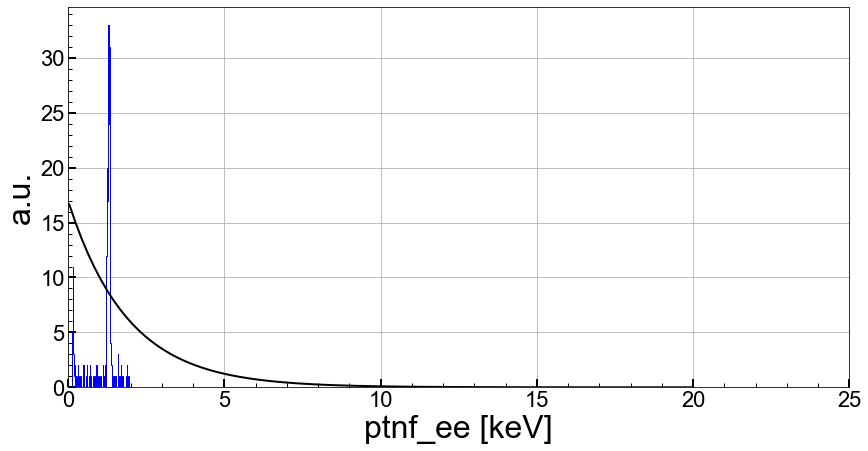

In [9]:
datarelease = np.append(np.loadtxt('data/event_EnergykeVee_Per1.txt'),np.loadtxt('data/event_EnergykeVee_Per2.txt'), axis = 0)

plt.figure(figsize= (14,7))
Ervec = np.linspace(0.04,20,100)
print(dRdENR(Ervec))
plt.plot(Ervec,10*dRdENR(Ervec),color='k',label="Lewin Eq. 1.1")
plt.xlim([0,2.5])
plt.hist(datarelease, histtype = 'step', color = 'blue', bins = np.linspace(0, 2 , 200))
plt.xlabel('ptnf_ee [keV]'); plt.ylabel('a.u.'); plt.grid()
plt.show()

